In [21]:
import pandas as pd
import json
import ast
import pickle
import geopandas as gpd
from functools import reduce
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import os
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import researchpy as rp
import scikit_posthocs as sp
from scipy.stats import kendalltau
from urllib.request import urlopen

In [22]:
df1 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2012.B18102-Data.csv",skiprows=[1])
df2 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2013.B18102-Data.csv",skiprows=[1])
df3 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2014.B18102-Data.csv",skiprows=[1])
df4 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2015.B18102-Data.csv",skiprows=[1])
df5 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2016.B18102-Data.csv",skiprows=[1])
df6 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2017.B18102-Data.csv",skiprows=[1])
df7 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2018.B18102-Data.csv",skiprows=[1])
df8 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2019.B18102-Data.csv",skiprows=[1])
df9 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2020.B18102-Data.csv",skiprows=[1])
df10 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2021.B18102-Data.csv",skiprows=[1])


#df11 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2021.B18102-Data.csv",skiprows=[1])
#df12 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2022.B18102-Data.csv",skiprows=[1])

# Column label lists to use for various operations
all_cols = ['B18102_004E', 'B18102_007E', 'B18102_010E','B18102_013E', 'B18102_016E', 'B18102_019E', 'B18102_023E', 'B18102_026E','B18102_029E', 'B18102_032E', 'B18102_035E', 'B18102_038E']
male_loss_cols = [ 'B18102_004E', 'B18102_007E', 'B18102_010E','B18102_013E', 'B18102_016E', 'B18102_019E']
female_loss_cols = ['B18102_023E', 'B18102_026E','B18102_029E', 'B18102_032E', 'B18102_035E', 'B18102_038E']

years = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

In [23]:
i = 0
for df in dfs:
    df['Year'] = years[i]
    i = i+1

    #Generate a FIPS column and populate it from GEOID and use it as an index
for item in dfs:
    item['FIPS'] = item['GEO_ID'].str[9:]
    #item.set_index(['FIPS'], inplace=True)

In [24]:
# Create a dictionary to map state codes to two-character state abbreviations
state_lookup = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO',
    '09': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI',
    '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY',
    '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN',
    '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH',
    '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH',
    '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD',
    '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA',
    '54': 'WV', '55': 'WI', '56': 'WY', '72': 'PR'
}

# Split FIPS code to extract state code and create a new column for state abbreviation
for df in dfs:
    df['County'] = df['FIPS']


In [25]:
# Define a function to calculate metrics
def calculate_metrics(df):
    df['TotalLoss'] = df[all_cols].sum(axis=1)
    df['PercentageLoss'] = df['TotalLoss'] * 100 / df['B18102_001E']

    df['TotalLossMale'] = df[male_loss_cols].sum(axis=1)
    df['PercentageLossMale'] = df['TotalLossMale'] * 100 / df['B18102_002E']

    df['TotalLossFemale'] = df[female_loss_cols].sum(axis=1)
    df['PercentageLossFemale'] = df['TotalLossFemale'] * 100 / df['B18102_021E']

    return df

# Apply calculate_metrics to each DataFrame
dfs_calculated = [calculate_metrics(df) for df in dfs]

# Concatenate the DataFrames
result_df = pd.concat(dfs_calculated)
result_df['state'] = result_df['NAME'].apply(lambda x: x.split(', ')[-1])
result_df1 = result_df[~result_df['state'].isin(['Puerto Rico', 'Alaska', 'Hawaii'])]

# Create pivot table
pivot_table = pd.pivot_table(result_df1, index=['County', 'Year'], values=['TotalLoss', 'PercentageLoss', 'PercentageLossMale', 'PercentageLossFemale'])
pivot_table.reset_index(inplace=True)

In [26]:
county_year_counts = pivot_table[pivot_table['Year'].isin(years)].groupby('County')['Year'].nunique()
full_data_counties = county_year_counts[county_year_counts == len(years)].index
filtered_data = pivot_table[pivot_table['County'].isin(full_data_counties)]
table = filtered_data

In [27]:
# Get unique states
counties = table['County'].unique()

In [29]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import soft_dtw

40.458 --> 20.779 --> 20.373 --> 19.987 --> 19.870 --> 19.817 --> 19.752 --> 19.727 --> 19.725 --> 19.709 --> 


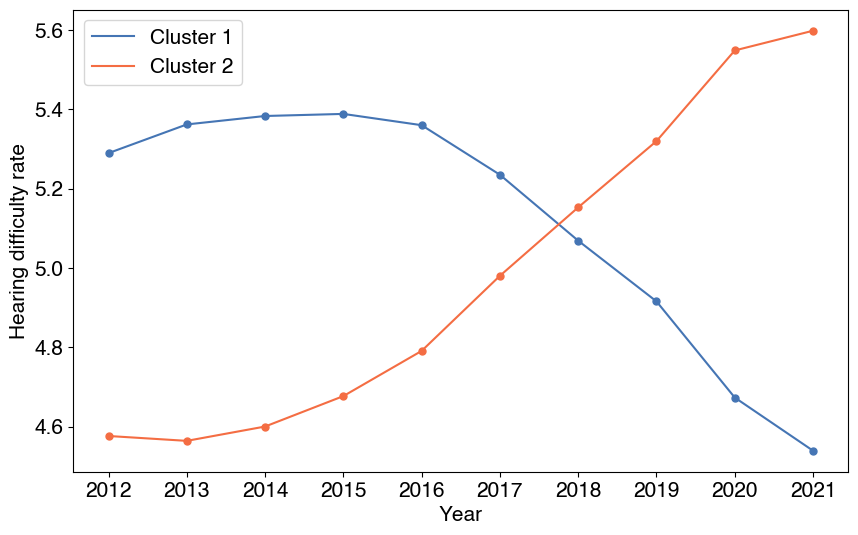

In [30]:
np.random.seed(0)
max_length = max(len(table[table['County'] == county]) for county in counties)
series = np.zeros(shape=(len(counties), max_length))

for index, county in enumerate(counties):
    county_data = table[table['County'] == county]['PercentageLoss'].to_numpy()
    series[index, :len(county_data)] = county_data

scaler = TimeSeriesScalerMeanVariance()
series_normalized = scaler.fit_transform(series)

tsne = TSNE(n_components=2, random_state=42)
embedded_series = tsne.fit_transform(series)

num = 2

kmeans = TimeSeriesKMeans(n_clusters=num, metric="softdtw", metric_params={"gamma": .01}, verbose=True, max_iter=10, n_init=1)
cluster_labels = kmeans.fit_predict(series_normalized)

clusters = {}
for i, county in enumerate(counties):
    cluster_label = cluster_labels[i] + 1
    if cluster_label not in clusters:
        clusters[cluster_label] = []
    clusters[cluster_label].append(county)

centroids = []
for i in range(num):
    cluster_series = series[cluster_labels == i]
    centroid = np.mean(cluster_series, axis=0)
    centroids.append(centroid)

colors = ['#4575b4','#f46d43']

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams.update({'font.size': 15})  # 设置字体大小

plt.figure(figsize=(10, 6))
for i in range(num):
    plt.plot(years, centroids[i], color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(years, centroids[i].ravel(), color=colors[i], marker='o', s=25)

plt.xlabel('Year')
plt.ylabel('Hearing difficulty rate')
plt.xticks(years, years)
plt.legend(loc='best')


plt.show()


In [31]:
centroids

[array([5.28940287, 5.36169682, 5.38294634, 5.38821007, 5.35978487,
        5.23487522, 5.06873868, 4.91578313, 4.67346772, 4.53950044]),
 array([4.57661762, 4.56434317, 4.60045528, 4.67713297, 4.79101917,
        4.98024765, 5.15269813, 5.3196427 , 5.54810123, 5.5978241 ])]

In [32]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

county_df=pd.DataFrame()
county_df['FIPS'] = pd.DataFrame(counties)
county_df['Cluster'] = None

for cluster, counties in clusters.items():
    county_df.loc[county_df['FIPS'].isin(counties), 'Cluster'] = cluster

In [34]:
table.columns = ['FIPS', 'Year', 'Hearing difficulty rate', 'PercentageLossFemale',
       'PercentageLossMale', 'TotalLoss']

In [35]:
table1 = table[['FIPS','Hearing difficulty rate']]

In [36]:
data = table.merge(county_df, on='FIPS',how='left')

In [37]:
data = data[['FIPS','Year','Hearing difficulty rate','Cluster']]

In [38]:
data1 = data[data['Cluster']==1]
data2 = data[data['Cluster']==2]

In [39]:
data_by_year1 = [data1[data1['Year'] == year]['Hearing difficulty rate'].values for year in range(2012, 2022)]
data_by_year2 = [data2[data2['Year'] == year]['Hearing difficulty rate'].values for year in range(2012, 2022)]

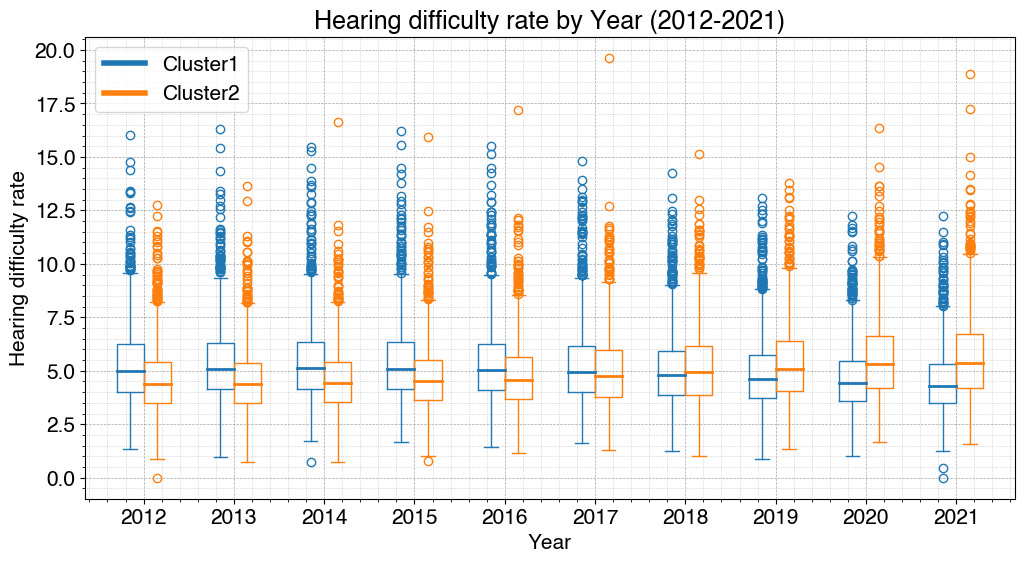

In [46]:
data_by_year1 = [data1[data1['Year'] == year]['Hearing difficulty rate'].values for year in range(2012, 2022)]
data_by_year2 = [data2[data2['Year'] == year]['Hearing difficulty rate'].values for year in range(2012, 2022)]

plt.figure(figsize=(12, 6))


positions1 = np.arange(1, 11)
plt.boxplot(data_by_year1, positions=positions1 - 0.15, widths=0.3, patch_artist=False,
            boxprops=dict(color="C0"),
            capprops=dict(color="C0"),
            whiskerprops=dict(color="C0"),
            flierprops=dict(color="C0", markeredgecolor="C0"),
            medianprops=dict(color="C0", linewidth=2))

positions2 = np.arange(1, 11) 
plt.boxplot(data_by_year2, positions=positions2 + 0.15, widths=0.3, patch_artist=False,
            boxprops=dict(color="C1"),
            capprops=dict(color="C1"),
            whiskerprops=dict(color="C1"),
            flierprops=dict(color="C1", markeredgecolor="C1"),
            medianprops=dict(color="C1", linewidth=2))

plt.title('Hearing difficulty rate by Year (2012-2021)')
plt.xlabel('Year')
plt.ylabel('Hearing difficulty rate')
plt.xticks(np.arange(1, 11), range(2012, 2022))


plt.minorticks_on()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

handles = [plt.Line2D([0], [0], color="C0", lw=4, label='Cluster1'),
           plt.Line2D([0], [0], color="C1", lw=4, label='Cluster2')]
plt.legend(handles=handles)

plt.show()


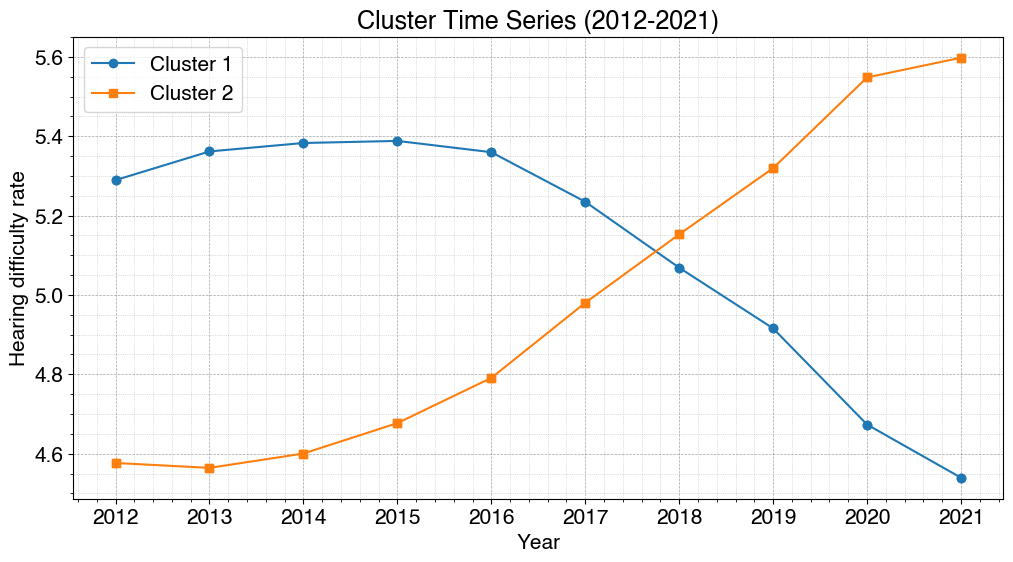

In [47]:
years = np.arange(2012, 2022)
cluster1 = np.array([5.28940287, 5.36169682, 5.38294634, 5.38821007, 5.35978487,
                     5.23487522, 5.06873868, 4.91578313, 4.67346772, 4.53950044])
cluster2 = np.array([4.57661762, 4.56434317, 4.60045528, 4.67713297, 4.79101917,
                     4.98024765, 5.15269813, 5.3196427, 5.54810123, 5.5978241])

plt.figure(figsize=(12, 6))

plt.plot(years, cluster1, color='C0', marker='o', label='Cluster 1')
plt.scatter(years, cluster1, color='C0', marker='o')
plt.plot(years, cluster2, color='C1', marker='s', label='Cluster 2')
plt.scatter(years, cluster2, color='C1', marker='s')

plt.title('Cluster Time Series (2012-2021)')
plt.xlabel('Year')
plt.ylabel('Hearing difficulty rate')
plt.xticks(years, years)

plt.minorticks_on()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

plt.legend(loc='best')
plt.show()


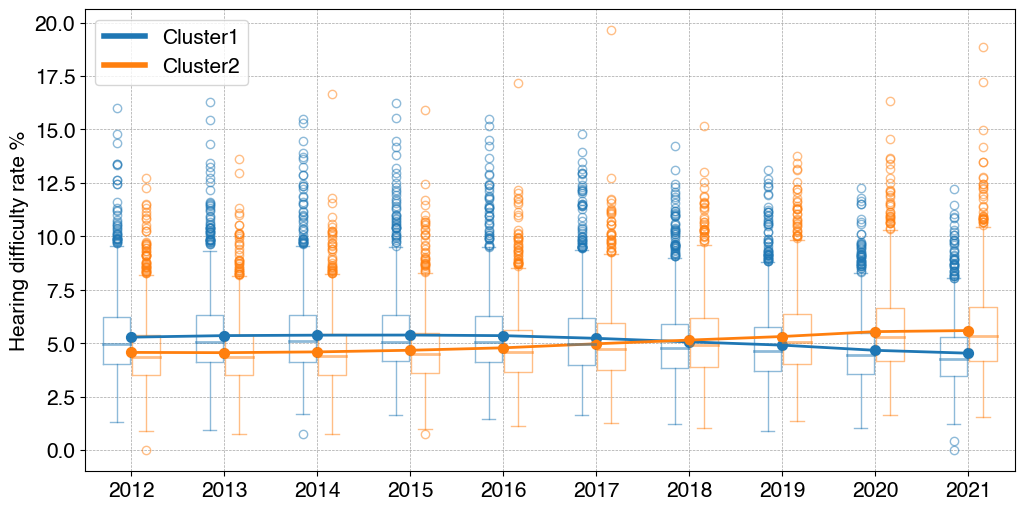

In [55]:
data_by_year1 = [data1[data1['Year'] == year]['Hearing difficulty rate'].values for year in range(2012, 2022)]
data_by_year2 = [data2[data2['Year'] == year]['Hearing difficulty rate'].values for year in range(2012, 2022)]

plt.figure(figsize=(12, 6))

positions1 = np.arange(1, 11)  # 箱线图的位置
plt.boxplot(data_by_year1, positions=positions1 - 0.16, widths=0.3, patch_artist=False,
            boxprops=dict(color="C0", alpha=0.5),
            capprops=dict(color="C0", alpha=0.5),
            whiskerprops=dict(color="C0", alpha=0.5),
            flierprops=dict(color="C0", markeredgecolor="C0", alpha=0.5),
            medianprops=dict(color="C0", linewidth=2, alpha=0.5))

positions2 = np.arange(1, 11)  # 箱线图的位置
plt.boxplot(data_by_year2, positions=positions2 + 0.16, widths=0.3, patch_artist=False,
            boxprops=dict(color="C1", alpha=0.5),
            capprops=dict(color="C1", alpha=0.5),
            whiskerprops=dict(color="C1", alpha=0.5),
            flierprops=dict(color="C1", markeredgecolor="C1", alpha=0.5),
            medianprops=dict(color="C1", linewidth=2, alpha=0.5))

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

years = np.arange(2012, 2022)
cluster1 = np.array([5.28940287, 5.36169682, 5.38294634, 5.38821007, 5.35978487,
                     5.23487522, 5.06873868, 4.91578313, 4.67346772, 4.53950044])
cluster2 = np.array([4.57661762, 4.56434317, 4.60045528, 4.67713297, 4.79101917,
                     4.98024765, 5.15269813, 5.3196427, 5.54810123, 5.5978241])

plt.xlim(0.5, 10.5)

plt.plot(np.arange(1, 11), cluster1, color='C0', marker='o', label='Cluster 1', linewidth=2)
plt.scatter(np.arange(1, 11), cluster1, color='C0', marker='o', s=50)  # s=50 设置散点大小

plt.plot(np.arange(1, 11), cluster2, color='C1', marker='o', label='Cluster 2', linewidth=2)
plt.scatter(np.arange(1, 11), cluster2, color='C1', marker='o', s=50)  # s=50 设置散点大小

plt.ylabel('Hearing difficulty rate %')
plt.xticks(np.arange(1, 11), range(2012, 2022))

handles = [plt.Line2D([0], [0], color="C0", lw=4, label='Cluster1'),
           plt.Line2D([0], [0], color="C1", lw=4, label='Cluster2')]
plt.legend(handles=handles)

plt.show()
